# QSVM




---


#### To begging I would like to divide this task in two parts
#### 1.  **Classical Part**
#### 2.   **Quantum Part**
#### The idea is compare the results in both parts

# **Classical Part**



### In this part, I'll cover everything about preprocessing and manipulating the data set, in such a way that it can be used to train a classic SVC model. Also the training data would be ready to be used in the Quantum Part.





In [ ]:
from IPython.display import clear_output

In [ ]:
!pip install 'qiskit[nature]'
!pip install qiskit[visualization]
!pip install qiskit-machine-learning
!pip install ibm_quantum_widgets
!pip install pylatexenc
clear_output()

In [ ]:
!pip install scikit-learn==1.0.2
clear_output()

In [ ]:
import sklearn
sklearn.__version__

'1.0.2'

In [ ]:
# General Imports
import numpy as np
import pandas as pd
import time

# Visualisation Imports
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn Imports
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix




> ##### To this oportunity I will use Qiskit that is a software development kit created by IBM to work with quantum computers.



In [ ]:
# Qiskit Imports
from qiskit import Aer, execute
from qiskit.circuit import QuantumCircuit, Parameter, ParameterVector, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import PauliFeatureMap, ZFeatureMap, ZZFeatureMap
from qiskit.circuit.library import TwoLocal, NLocal, RealAmplitudes, EfficientSU2
from qiskit.circuit.library import HGate, RXGate, RYGate, RZGate, CXGate, CRXGate, CRZGate
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit.tools.monitor import job_monitor

### **Getting Data**

In [ ]:
data = pd.read_csv("/content/iris.data",header=None)
data.columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
print("Data Shape: ", data.shape)

Data Shape:  (150, 5)


### **Pre processing Data**

In [ ]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### We can see that there isn't empty data

In [ ]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [ ]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [ ]:
data.duplicated().sum()

3

#### There are 3 duplicate data, that will be eliminated before the training

In [ ]:
duplicate = data[data.duplicated()]
duplicate

,sepal_length,sepal_width,petal_length,petal_width,class
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [ ]:
data = data.drop_duplicates()
data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#### Now We will see the data distribution separete by labels

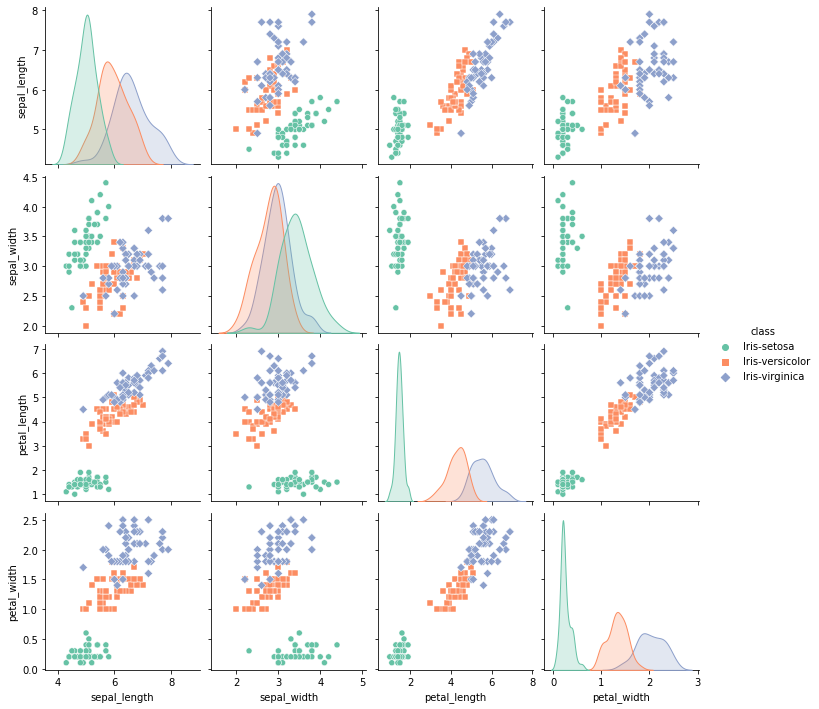

In [ ]:
sns.pairplot(data, kind="scatter", hue="class", markers=["o", "s", "D"], palette="Set2")

##### It can be clearly seen that the data labeled iris-versicolor and iris-virginica overlap at certain points, unlike the data labeled iris-setosa which differ much more. This tells us that when making predictions, the trained model could fail with the iris-versicolor and iris-virginica data and confuse them with each other.

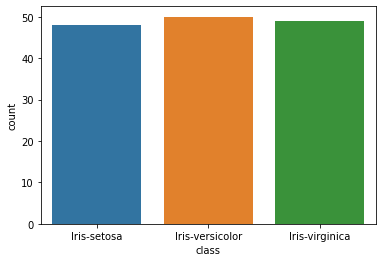

In [ ]:
sns.countplot(data=data, x="class");

#### We can see the all the label are balanced so the accuracy metric will be so important.

In [ ]:
#Encoding the labels
le = LabelEncoder()
data["class"] = le.fit_transform(data["class"])
data_labels = le.classes_
le_dict = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_dict)

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


In [ ]:
data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#### Now we will separate in train and test data.

In [ ]:
X = data.drop('class', axis = 1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(117, 4)
(117,)
(30, 4)
(30,)


## **Training the SVC using RandomizedSearchCV**

In [ ]:
C = [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
kernel = ['linear', 'rbf']
gamma = [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]

In [ ]:
# Create the param grid
param_grid = {'C': C,
               'kernel': kernel,
               'gamma': gamma,
             }
print(param_grid)

{'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]}


In [ ]:
SVC_Model = SVC()

## Don't forget that the **sklearn.svm.SVC** function has a parameter called **decision_function_shape**, this parameter can receive as a value {‘ovo’, ‘ovr’},

* ##   'ovo': to return a one-vs-one (‘ovo’) decision function 
* ##  'ovr': to return a one-vs-rest (‘ovr’) decision function

## But if you dont specify this parameter, the default value is ’ovr’



### **Therefore all the trainings that will be done in this notebook will have the format one-vs-all or one-vs-rest**

In [ ]:
rf_RandomGrid = RandomizedSearchCV(estimator = SVC_Model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [ ]:
rf_RandomGrid.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=SVC(), n_jobs=4,
                   param_distributions={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3,
                                              1.4],
                                        'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2,
                                                  1.3, 1.4],
                                        'kernel': ['linear', 'rbf']},
                   verbose=2)

In [ ]:
#The best parameters that trained the SVC model.
rf_RandomGrid.best_params_

{'kernel': 'linear', 'gamma': 0.1, 'C': 1.1}

In [ ]:
best_grid = rf_RandomGrid.best_estimator_

In [ ]:
y_predict_classical = best_grid.predict(X_test)

In [ ]:
metric_report_classical =  classification_report(y_test, y_predict_classical)

In [ ]:
print(metric_report_classical)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.90      0.95        10
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
cf_matrix = confusion_matrix(y_test, y_predict_classical)

In [ ]:
cm_array_df = pd.DataFrame(cf_matrix, index=data_labels, columns=data_labels)

<AxesSubplot:>

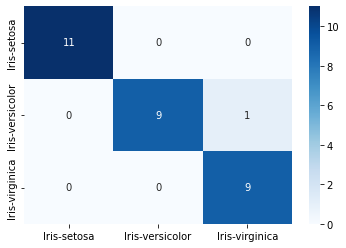

In [ ]:
sns.heatmap(cm_array_df, cmap='Blues', annot=True)

# **Quantum Part**

### On this part we should to remember how to the classical Supor Vector Machine Algorhitm works.

### In a very reduced way we can say that the SVM classifier works by drawing a straight line (for the simplest case, like the image, but in general it is a hyperplane) between two classes. All data points that fall on one side of the line will be labeled as one class, and all points that fall on the other side will be labeled as the second. But since there are many straight lines separating the data, the goal is to find the best straight line. As we can see in the next image.



<img src="https://www.tutorialspoint.com/scikit_learn/images/marginal_hyperplane.jpg"  width="60%" height="30%">

### We can white generally an hyperplane like this:

### $wx - b = 0%$



### So we search for two hyperplanes such that there are no points (best case) between them and we maximize their distance. The area between the hyperplanes is the margin.

### So after using the necessary mathematics, we can arrive at the following:

### We need to find $\vec{\alpha}$ that minize the L function:

### $L = -\sum_{i=0}^{m}\alpha_{i} + \frac{1}{2} \sum_{i=0}^{m} \sum_{j=0}^{m} \alpha_{i} \alpha_{j} f(\vec{x_{i}}) f(\vec{x_{j}}) \vec{x_{i}} \cdot \vec{x_{j}}$

### where $\vec{x_i}$ refers to the features of the ith point and $f(\vec{x_i})$ to its corresponding label.

### From $\vec{\alpha}$ you can get the classification hyperplane.

### But there is a problem, Some problems can’t be solved using linear hyperplane, as shown in the figure below.

<img src="https://miro.medium.com/v2/resize:fit:786/format:webp/1*yLQxzD1GR9Wt2-kcAMVARg.png"  width="60%" height="30%">

### In such situation, SVM uses a kernel trick to transform the input space to a higher dimensional space.


<img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*zWzeMGyCc7KvGD9X8lwlnQ.png"  width="60%" height="30%">

### This part is very important, since this is where quantum computing is used, since if we can remember, with n qbits we can represent vectors of dimension $2^n$, which is exactly what you are looking for with the kernel trick.

### In practice, the feature space's dimensionality sometimes can be extremely large (even goes to infinity). So we do not wish to tackle these feature vectors directly. Another key idea in kernel methods is that we can implicitly analyze these feature vectors by only accessing their inner products in the feature space, which is noted as kernel functions $K(,)$:

### $$ K(\vec{x_{i}}, \vec{x_{j}}) = \phi(\vec{x_{j}})^T \phi(\vec{x_{i}}),
\tag{1} $$

### with $\phi()$ being the feature map. We note that in kernel methods, we do not need to express the feature map explicitly. Instead, we only need to compute the kernel function. This approach can introduce non-linearity into our models, giving us the ability to recognize intractable patterns in the original data space. 

### So How to introduce Kernel functions here?

###You just have to change the function to minimize:

### $L = -\sum_{i=0}^{m}\alpha_{i} + \frac{1}{2} \sum_{i=0}^{m} \sum_{j=0}^{m} \alpha_{i} \alpha_{j} f(\vec{x_{i}}) f(\vec{x_{j}}) \phi(\vec{x_{i}}) \cdot \phi(\vec{x_{j}})$
### $L = -\sum_{i=0}^{m}\alpha_{i} + \frac{1}{2} \sum_{i=0}^{m} \sum_{j=0}^{m} \alpha_{i} \alpha_{j} f(\vec{x_{i}}) f(\vec{x_{j}}) K(\vec{x_{i}}, \vec{x_{j}})$

### Therefore, what we will do is calculate all the internal products through our mapping function, that is, the Gramm matrix.

### So basically, we can show the idea of QSVM in the next picture 


![](https://drive.google.com/uc?id=1VdBGi_CWrgZ_t6V8_URmtEEFomZl2oPr)

### So before starting to encode, it is important to be clear that the SVM algorithm only makes use of the quantum part when qbits are used to encode the classical data using the feature map and the kernel, since there are also purely classic and well-known kernels, such as Linear, Gaussian, Polynomial between others.

### The idea is to be able to compute the gram matrix so that it can be used in the classical SVC algorithm, but using a quantum parametric circuit kernel, so we can do this in 3 different ways, which as we will see some ways are more efficient than others:



## 1. Firts Way: Using the qiskit library functions






> ### This is the easiest way to do it, because qiskit already has ready packages that do most of the work, as we'll see next:








> ### To get started, we created a completely custom parameterized circuit feature map.



In [ ]:
def feature_map(repeats = 1):
  """
  Feature function that encoding the classical data to quantum states
  This function is to use with the qiskit functions
  Args:
      repeats (int): Number of repetitions of the quantum circuit
  Returns:
      The qiskit circuit
  """
  qubits = 4 #Number of features (columns) of the training data

  x = ParameterVector('x', length=qubits)
  var_custom = QuantumCircuit(qubits)

  for _ in range(repeats):
      for i in range(qubits):
          var_custom.rx(x[i], i)
      for i in range(qubits):
          for j in range(i + 1, qubits):
              var_custom.cx(i, j)
              var_custom.p(x[i] * x[j], j)
              var_custom.cx(i, j)
      var_custom.barrier()
            
  return var_custom


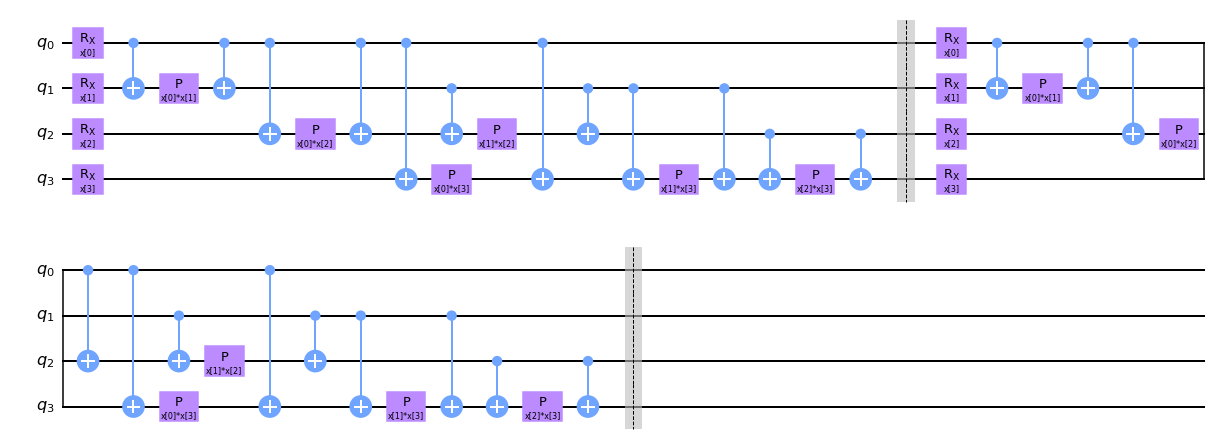

In [ ]:
#Drawing our custom parameterized circuit
feature_map(repeats=2).draw('mpl')

In [ ]:
#Defining the kernel function
custom_kernel_v1 = QuantumKernel(feature_map=feature_map(), quantum_instance=Aer.get_backend('statevector_simulator'))

#Build the kernel matrix to train and test 
st = time.time()
matrix_train_v1 = custom_kernel_v1.evaluate(x_vec=X_train)
matrix_test_v1 = custom_kernel_v1.evaluate(x_vec=X_test, y_vec=X_train)
et = time.time()
elapsed_time = (et - st)
print('Execution time:', elapsed_time, 'seconds')
print(matrix_train_v1.shape)

Execution time: 3.6348447799682617 seconds
(117, 117)




> ### For this task that I was able to perform, it is important to note the time that the Qiskit functions took to build the train and test gram matrices.



In [ ]:
#We can note that is a simmetric Matrix
matrix_train_v1

array([[1.        , 0.04491096, 0.38421764, ..., 0.08031917, 0.08654201,
        0.50376376],
       [0.04491096, 1.        , 0.1650755 , ..., 0.31803174, 0.20382382,
        0.04595096],
       [0.38421764, 0.1650755 , 1.        , ..., 0.12905956, 0.13067179,
        0.25415451],
       ...,
       [0.08031917, 0.31803174, 0.12905956, ..., 1.        , 0.24365845,
        0.10844914],
       [0.08654201, 0.20382382, 0.13067179, ..., 0.24365845, 1.        ,
        0.1298274 ],
       [0.50376376, 0.04595096, 0.25415451, ..., 0.10844914, 0.1298274 ,
        1.        ]])

In [ ]:
print(matrix_test_v1.shape)

(30, 117)




> ### Now once the gram matrices for training and testing have been created, we can use the classic SVC model from the Sklearn library and observe the results.


In [ ]:
#Training the model
custom_svc_v1 = SVC(kernel='precomputed')
custom_svc_v1.fit(matrix_train_v1, y_train)

SVC(kernel='precomputed')

In [ ]:
#Predicting the test values
y_predict_v1 = custom_svc_v1.predict(matrix_test_v1)

In [ ]:
#Getting all the metrics
metric_report_v1 = classification_report(y_test, y_predict_v1)

In [ ]:
print(metric_report_v1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.90      0.95        10
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



### For this task it is important to note the time it took for the Qiskit functions to construct the train and test gram matrices.

## 2. Second Way: Using the $UU†$ format




> ### Now we will try to calculate the gram matrix without qiskit functions. This time we will realize that the construction of the matrix is very slow.



In [ ]:

def feature_map_v2(x,repeats=1):
  """
  Feature function that encoding the classical data to quantum states
  This function is to use with the our own functions that calculates the gram matrix
  Args:
      x (array) : A vector that will be encoded
      repeats (int): Number of repetitions of the quantum circuit
  Returns:
      The qiskit circuit
  """
  qubits = 4 #Numero de features

  var_custom = QuantumCircuit(qubits)

  for _ in range(repeats):
      for i in range(qubits):
          var_custom.rx(x[i], i)
      for i in range(qubits):
          for j in range(i + 1, qubits):
              var_custom.cx(i, j)
              var_custom.p(x[i] * x[j], j)
              var_custom.cx(i, j)
      var_custom.barrier()

  return var_custom


x1 = [0.1,0.2,0.3,0.4] #This values are examples to show how this method works
x2 = [0.5,0.6,0.7,0.8]


> ### So the idea can show in the next picture:



![](https://drive.google.com/uc?id=1jjTonqh8cLeuPE7v9oofpwlUW6m7Vd1x)

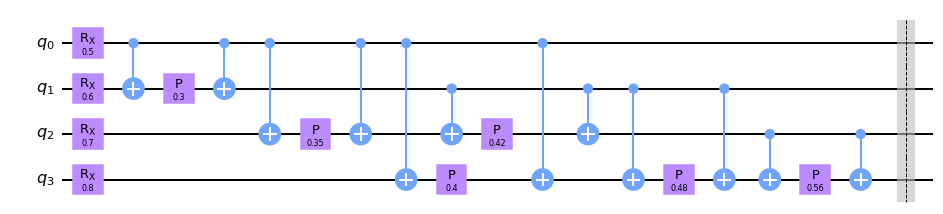

In [ ]:
qc = feature_map_v2(x2)
qc.draw('mpl')

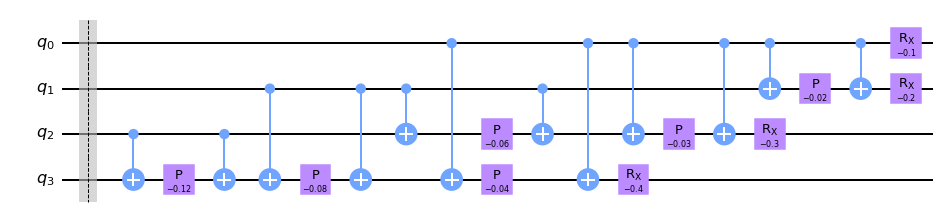

In [ ]:
#Adding the adjoin gate
qc_inverse = feature_map_v2(x1).inverse()
qc_inverse.draw('mpl')

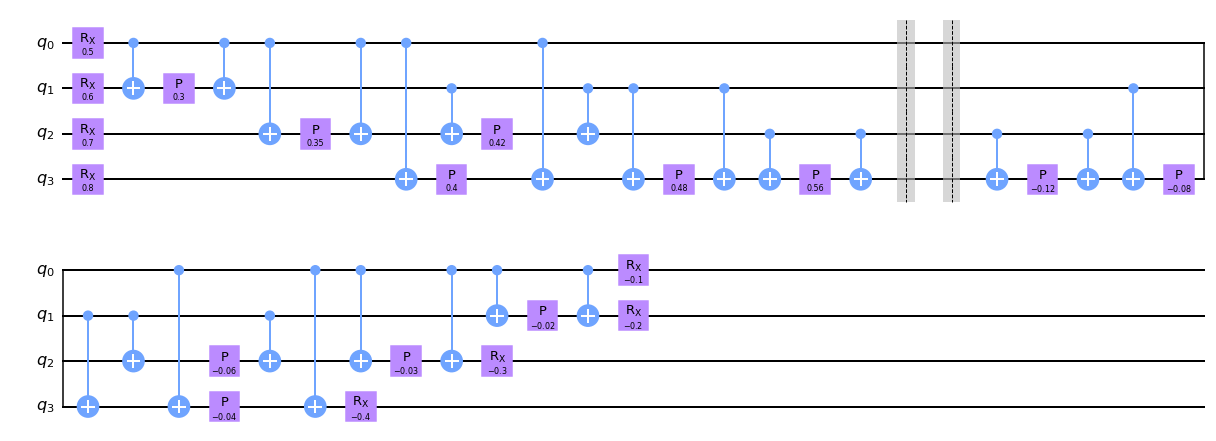

In [ ]:
#Joining both circuits 
custom_qc_v2 = qc.compose(qc_inverse)
custom_qc_v2.draw('mpl')



> ### Now We need to figure out the probability of getting the |0000> state



In [ ]:
backend = Aer.get_backend('statevector_simulator')

result = execute(custom_qc_v2, backend, shots=1000).result()

In [ ]:
statevector = result.get_statevector(custom_qc_v2)

In [ ]:
statevector.probabilities()

array([7.12382145e-01, 4.20404177e-02, 5.58032314e-02, 1.42724842e-03,
       7.64274137e-02, 1.39236136e-03, 1.01485457e-03, 1.01403611e-04,
       1.05788958e-01, 1.39038732e-03, 8.54350571e-04, 1.57933850e-04,
       4.53342172e-04, 2.63118630e-04, 4.48334361e-04, 5.44992308e-05])

In [ ]:
print("The Inner product of x1 and x2 is: ", statevector.probabilities()[0])

The Inner product of x1 and x2 is:  0.7123821448639467




> ### We will now put the above in a function and use it to calculate the gram matrix for training and testing in our task.



In [ ]:
def inner_product_v2(x1, x2):
  """
  Inner product between two states
  Args:
      x1 (array): A vector
      x2 (array): A vector
  Returns:
      The probilitity to get the |0000> state
  """
  qc = feature_map_v2(x2)
  qc_inverse = feature_map_v2(x1).inverse()
  qc_result = qc.compose(qc_inverse)
  backend = Aer.get_backend('statevector_simulator')

  result = execute(qc_result, backend, shots=1000).result()
  statevector = result.get_statevector(qc_result)
  #Returns the probability to get the |0000> state
  return statevector.probabilities()[0]

print(inner_product_v2(x1, x2)) #Same response as previous cell, so is OK!

0.7123821448639467


In [ ]:
def KernelGramMatrixFull_v2(X1, X2):
  """
  Inner product between two states
  Args:
      X1 (DataFrame): TrainDta or TestData
      X2 (DataFrame): TrainDta
  Returns:
      The gram Matrix
  """
  st = time.time()
  print("Calculating Gram matrix")
  X1=X1.to_numpy()
  X2=X2.to_numpy()
  gram_matrix = np.zeros((X1.shape[0], X2.shape[0]))
  for i, x1 in enumerate(X1):
      percent = int(i / len(X1) *100)
      print(percent, "%")
      
      for j, x2 in enumerate(X2):
          x1 = x1.flatten()
          x2 = x2.flatten()
          
          gram_matrix[i, j] = inner_product_v2(x1, x2)
      clear_output()
  et = time.time()
  elapsed_time = (et - st)/60.0
  print("100%")
  print('Execution time:', elapsed_time, 'minutes')
  return gram_matrix

In [ ]:
matrix_train_v2 = KernelGramMatrixFull_v2(X_train, X_train)

100%
Execution time: 11.909511435031892 minutes


In [ ]:
matrix_test_v2 = KernelGramMatrixFull_v2(X_test, X_train)

100%
Execution time: 2.977595317363739 minutes




> ### As indicated at the beginning of this section, the function that calculates the gram matrix is too slow, since it builds the matrix element by element using a nested loop, which causes it to have a complexity of O($n^2$ ) and be very slow. One solution would be to vectorize the function to take advantage of the properties of the arrays, but on this occasion he did not have the time to make this improvement.



In [ ]:
matrix_train_v2.shape

(117, 117)

In [ ]:
#Training the model
custom_svc_v2 = SVC(kernel='precomputed')
custom_svc_v2.fit(matrix_train_v2, y_train)

SVC(kernel='precomputed')

In [ ]:
#Predicting the test values
y_predict_v2 = custom_svc_v2.predict(matrix_test_v2)

In [ ]:
#Getting all the metrics
metric_report_v2 = classification_report(y_test, y_predict_v2)

In [ ]:
print(metric_report_v2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.90      0.95        10
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



## 3. Third Way: Using the Swap Test






> ### Now we will try to calculate the gram matrix without qiskit functions. Unlike the previous case, this time we will use the swap test to calculate the Kerner function and the gram matrix








> ### The swap test is a procedure in quantum computing that is used to check how much two quantum states differ. This method allows us to estimate the squared inner product between the two states indirectly. Which we will use for our function that builds the gram matrix. This next figure show as the circuit that you should to use.



<img src="https://upload.wikimedia.org/wikipedia/commons/d/d6/Quantum-swap-test-circuit-correct.png"  width="60%" height="30%">



> ### From the above expression it can be shown that:
> ## $P( | 0 \rangle) = \frac{1}{2} + \frac{1}{2}|\langle \psi | \phi \rangle|^2$
> ### We can see that in this case the phi and phi states only consist of one qbit, but in most cases there are more qbist (In our case 4 qbits) So this circuit varies a bit but respecting its essence. As we can see in the next cell


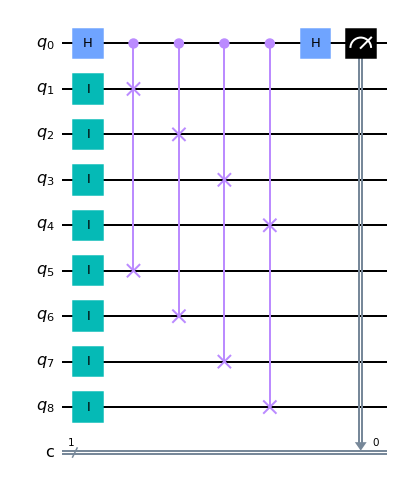

In [ ]:
num_qubits = 4 #Number of qbits!!!

circuit1 = QuantumCircuit(num_qubits)
for i in range(num_qubits):
    circuit1.id(i)

circuit2 = QuantumCircuit(num_qubits)
for i in range(num_qubits):
    circuit2.id(i)
    
swap_test_circuit = QuantumCircuit(2*num_qubits + 1,1)
swap_test_circuit.compose(circuit1)
swap_test_circuit.compose(circuit2)
swap_test_circuit.compose(circuit1, qubits=list(range(1,num_qubits+1)), inplace=True )
swap_test_circuit.compose(circuit2, qubits=list(range(num_qubits+1,2*num_qubits+1)), inplace=True )

swap_test_circuit.h(0)
for i in range(num_qubits):
    swap_test_circuit.cswap(0,i+1,i+num_qubits+1)
swap_test_circuit.h(0)
swap_test_circuit.measure([0],[0])
swap_test_circuit.draw("mpl")

### So, like the previous section, we will do a small example with x1 and x2. And then we will use it for the assigned task.

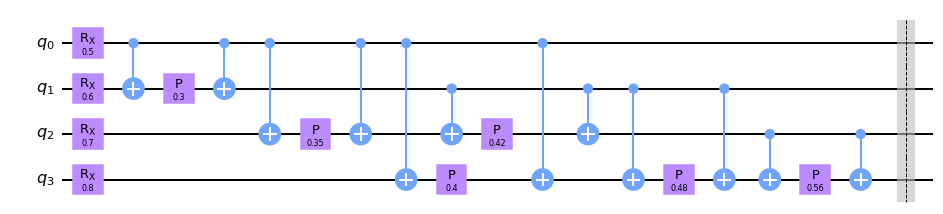

In [ ]:
qc_x2_v3 = feature_map_v2(x2)
qc_x2_v3.draw("mpl")

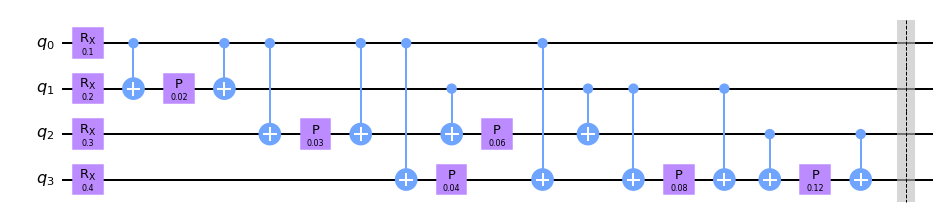

In [ ]:
qc_x1_v3 = feature_map_v2(x1)
qc_x1_v3.draw("mpl")

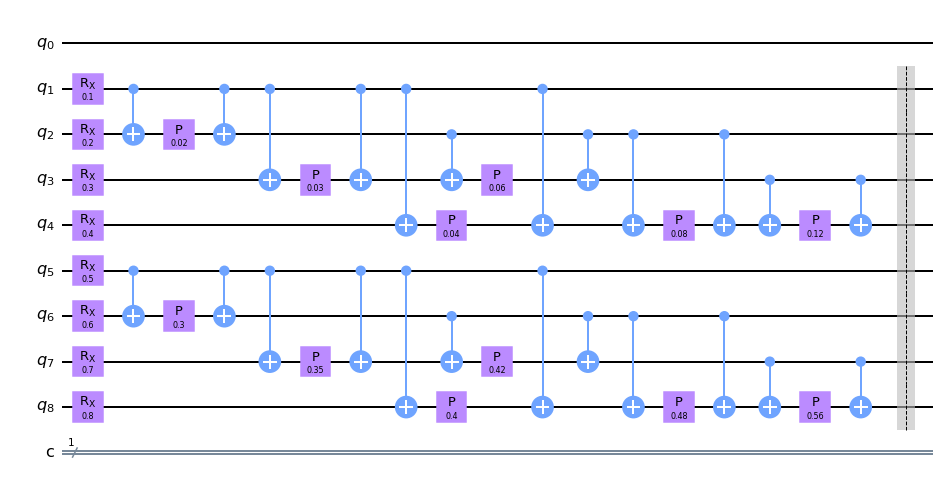

In [ ]:
prev_swap_test_circuit = QuantumCircuit(2*num_qubits + 1,1)
prev_swap_test_circuit.compose(qc_x1_v3)
prev_swap_test_circuit.compose(qc_x2_v3)
prev_swap_test_circuit.compose(qc_x1_v3, qubits=list(range(1,num_qubits+1)), inplace=True )
prev_swap_test_circuit.compose(qc_x2_v3, qubits=list(range(num_qubits+1,2*num_qubits+1)), inplace=True )
prev_swap_test_circuit.draw("mpl")

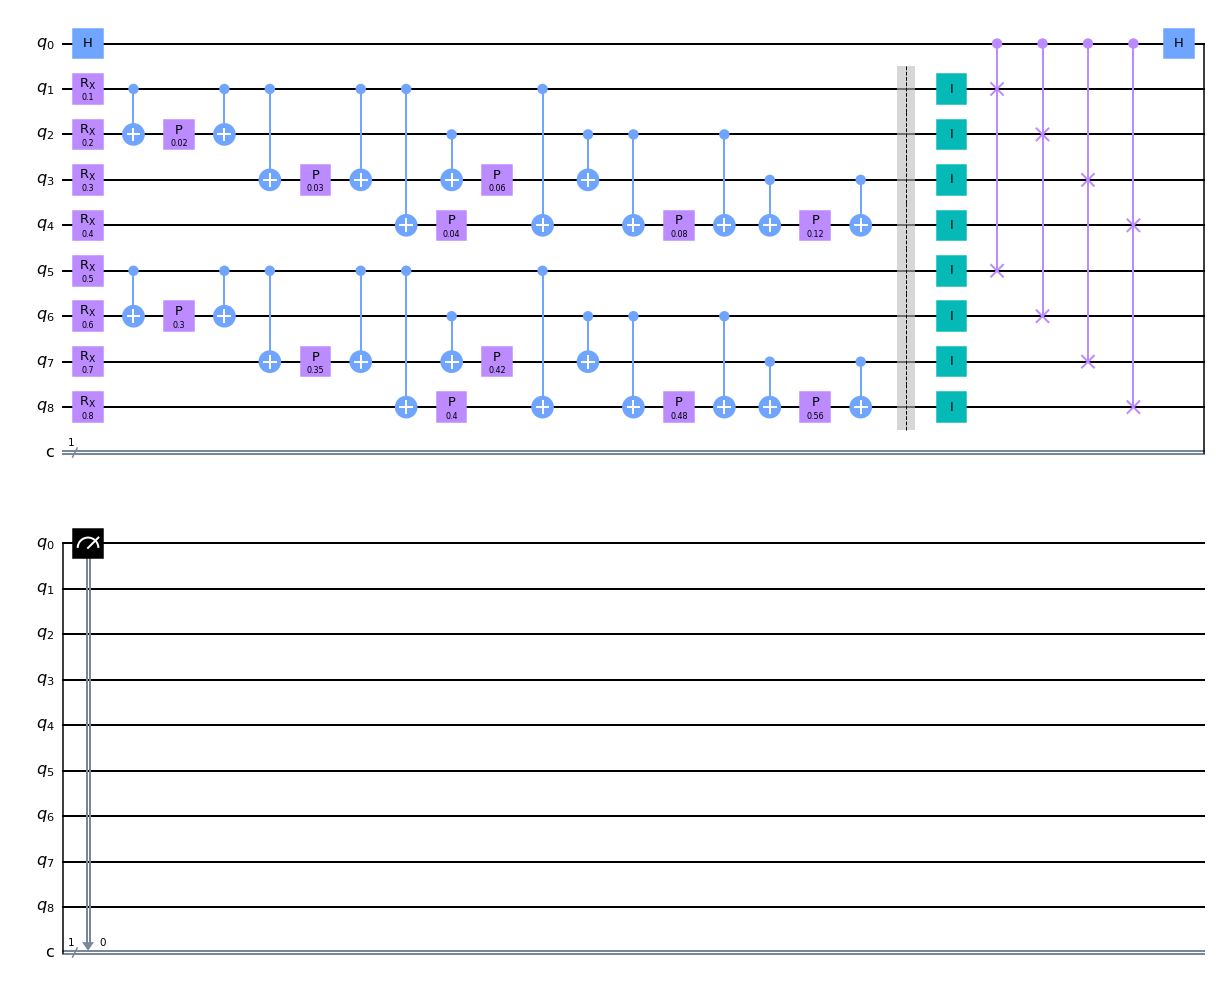

In [ ]:
qc_swap_result_v3 = prev_swap_test_circuit.compose(swap_test_circuit)
qc_swap_result_v3.draw("mpl")

In [ ]:
backend = Aer.get_backend('statevector_simulator')
nShots = 8192
result = execute(qc_swap_result_v3, backend, shots=nShots).result()
statevector = result.get_statevector(qc_swap_result_v3)
result.get_counts()

{'1': 1138, '0': 7054}

In [ ]:
counts = result.get_counts()

s = 2*counts["0"]/nShots - 1

print("Squared Inner Product:",str(s))
print("Counts: ",counts)
#The value obtained is very close to that obtained in the previous section.

Squared Inner Product: 0.72216796875
Counts:  {'1': 1138, '0': 7054}


In [ ]:
# If we remember the result in the previus secction
print(inner_product_v2(x1, x2))

0.7123821448639467




> ### Now We will put the above in a function and use it to calculate the gram matrix for training and testing in our task.



In [ ]:
def inner_product_swap_test(x1, x2):
  """
  Inner product between two states
  Args:
      x1 (array): A vector
      x2 (array): A vector
  Returns:
      The inner product
  """
  num_qubits = 4 #Number of features or columns
  circuit1 = QuantumCircuit(num_qubits)
  circuit2 = QuantumCircuit(num_qubits)

  swap_test_circuit = QuantumCircuit(2*num_qubits + 1,1)
  swap_test_circuit.compose(circuit1)
  swap_test_circuit.compose(circuit2)
  swap_test_circuit.compose(circuit1, qubits=list(range(1,num_qubits+1)), inplace=True )
  swap_test_circuit.compose(circuit2, qubits=list(range(num_qubits+1,2*num_qubits+1)), inplace=True )

  swap_test_circuit.h(0)
  for i in range(num_qubits):
    swap_test_circuit.cswap(0,i+1,i+num_qubits+1)
  swap_test_circuit.h(0)
  swap_test_circuit.measure([0],[0])
  

  circuit_x1 = feature_map_v2(x1)
  circuit_x2 = feature_map_v2(x2)

  prev_swap_test_circuit = QuantumCircuit(2*num_qubits + 1,1)
  prev_swap_test_circuit.compose(circuit_x1)
  prev_swap_test_circuit.compose(circuit_x2)
  prev_swap_test_circuit.compose(circuit_x1, qubits=list(range(1,num_qubits+1)), inplace=True )
  prev_swap_test_circuit.compose(circuit_x2, qubits=list(range(num_qubits+1,2*num_qubits+1)), inplace=True )

  qc_swap_result = prev_swap_test_circuit.compose(swap_test_circuit)

  backend = Aer.get_backend('statevector_simulator')
  nShots = 100 #Only 100 shots because it's too long running time for 100, since it has a complexity of O(n^2)
  result = execute(qc_swap_result, backend, shots=nShots).result()
  statevector = result.get_statevector(qc_swap_result)
  counts = result.get_counts()

  s = 2*counts["0"]/nShots - 1


  return s


In [ ]:
inner_product_swap_test(x1, x2)

0.74

In [ ]:
def KernelGramMatrixFull_v3(X1, X2):
  """
  Inner product between two states
  Args:
      X1 (DataFrame): TrainDta or TestData
      X2 (DataFrame): TrainDta
  Returns:
      The gram Matrix
  """
  st = time.time()
  print("Calculando matriz de Gram")

  X1=X1.to_numpy()
  X2=X2.to_numpy()
  gram_matrix = np.zeros((X1.shape[0], X2.shape[0]))
  for i, x1 in enumerate(X1):
      print(int(i / len(X1) *100), "%")
      for j, x2 in enumerate(X2):
          x1 = x1.flatten()
          x2 = x2.flatten()

          gram_matrix[i, j] = inner_product_swap_test(x1, x2)
      clear_output()
  et = time.time()
  elapsed_time = (et - st)/60.0
  print("100%")
  print('Execution time:', elapsed_time, 'minutes')
  return gram_matrix

In [ ]:
matrix_train_v3 = KernelGramMatrixFull_v3(X_train, X_train)

100%
Execution time: 17.273850762844084 minutes


In [ ]:
matrix_test_v3 = KernelGramMatrixFull_v3(X_test, X_train)

100%
Execution time: 4.5174257278442385 minutes


In [ ]:
matrix_train_v3.shape

(117, 117)

In [ ]:
matrix_train_v3

array([[ 1.  ,  0.18,  0.46, ...,  0.12,  0.18,  0.58],
       [-0.02,  1.  ,  0.22, ...,  0.48,  0.1 , -0.04],
       [ 0.32,  0.1 ,  1.  , ...,  0.24,  0.04,  0.3 ],
       ...,
       [ 0.18,  0.28,  0.02, ...,  1.  ,  0.24,  0.14],
       [ 0.04,  0.14,  0.16, ...,  0.16,  1.  ,  0.24],
       [ 0.62,  0.  ,  0.3 , ...,  0.04,  0.18,  1.  ]])

In [ ]:
#Training the model
custom_svc_v3 = SVC(kernel='precomputed')
custom_svc_v3.fit(matrix_train_v3, y_train)

SVC(kernel='precomputed')

In [ ]:
#Predicting the test values
y_predict_v3 = custom_svc_v3.predict(matrix_test_v3)

In [ ]:
#Getting all the metrics
metric_report_v3 = classification_report(y_test, y_predict_v3)

In [ ]:
print(metric_report_v3)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       0.90      0.90      0.90        10
           2       0.88      0.78      0.82         9

    accuracy                           0.90        30
   macro avg       0.90      0.89      0.89        30
weighted avg       0.90      0.90      0.90        30



## Finally, if we compare the precisions obtained from the 4 different ways of executing the same SVM algorithm (1 classical and 3 quantum), we can notice that the values are very similar except for the case of the swap test, where we used only 100 shots, this may be a reason why the gram matrix was not calculated very precisely and because the accuracy value dropped a bit. bit. Still 0.9 is a good result.

## To finish this notebook, we could test how the accuracy varies if we change the depth of our quantum circuit. Since the first and second ways give the same results in the gram matrix, we are going to use the first way only because it is more optimized and would take less time to test.

### With repeats = 2

In [ ]:
#Defining the kernel function with repeats = 2
custom_kernel_depp_2 = QuantumKernel(feature_map=feature_map(repeats = 2), quantum_instance=Aer.get_backend('statevector_simulator'))

#Build the kernel matrix to train and test 
st = time.time()
matrix_train_depp_2 = custom_kernel_depp_2.evaluate(x_vec=X_train)
matrix_test_depp_2 = custom_kernel_depp_2.evaluate(x_vec=X_test, y_vec=X_train)
et = time.time()
elapsed_time = (et - st)
print('Execution time:', elapsed_time, 'seconds')

Execution time: 2.1407551765441895 seconds


In [ ]:
#Training the model
custom_svc_depp_2 = SVC(kernel='precomputed')
custom_svc_depp_2.fit(matrix_train_depp_2, y_train)

SVC(kernel='precomputed')

In [ ]:
#Predicting the test values
y_predict_depp_2 = custom_svc_depp_2.predict(matrix_test_depp_2)

In [ ]:
#Getting all the metrics
metric_report_depp_2 = classification_report(y_test, y_predict_depp_2)

In [ ]:
print(metric_report_depp_2)

              precision    recall  f1-score   support

           0       0.80      0.73      0.76        11
           1       0.90      0.90      0.90        10
           2       0.60      0.67      0.63         9

    accuracy                           0.77        30
   macro avg       0.77      0.76      0.76        30
weighted avg       0.77      0.77      0.77        30



### We can notice that for 2 repetitions the accuracy drops to 0.77, which is not very good as the previous results when the depth of the quantum circuit was 1.

### With repeats = 3

In [ ]:
#Defining the kernel function with repeats = 2
custom_kernel_depp_3 = QuantumKernel(feature_map=feature_map(repeats = 3), quantum_instance=Aer.get_backend('statevector_simulator'))

#Build the kernel matrix to train and test 
st = time.time()
matrix_train_depp_3 = custom_kernel_depp_3.evaluate(x_vec=X_train)
matrix_test_depp_3 = custom_kernel_depp_3.evaluate(x_vec=X_test, y_vec=X_train)
et = time.time()
elapsed_time = (et - st)
print('Execution time:', elapsed_time, 'seconds')


Execution time: 3.379000186920166 seconds


In [ ]:
#Training the model
custom_svc_depp_3 = SVC(kernel='precomputed')
custom_svc_depp_3.fit(matrix_train_depp_3, y_train)

SVC(kernel='precomputed')

In [ ]:
#Predicting the test values
y_predict_depp_3 = custom_svc_depp_3.predict(matrix_test_depp_3)

In [ ]:
#Getting all the metrics
metric_report_depp_3 = classification_report(y_test, y_predict_depp_3)

In [ ]:
print(metric_report_depp_3)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.78      0.70      0.74        10
           2       0.64      0.78      0.70         9

    accuracy                           0.80        30
   macro avg       0.80      0.80      0.80        30
weighted avg       0.82      0.80      0.80        30



### For 3 iterations, that is, a deeper quantum loop, the accuracy goes up a bit to 0.8, but it does not reach 0.97 when the quantum loop iterations is 1, the reason could be that the model is getting too complex so there may be overfitting for the test data.